In [9]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import csv

plt.style.use('ggplot')

In [10]:
def dataset_to_monthly_mean(filename, substance):
    #importa il dataset
    dataset = pd.read_csv(filename, sep=';')
    #prende solo la sostanza scelta
    no2 = dataset[dataset['inquinante']==substance]
    #toglie i valori nulli
    no2 = no2[no2['valore'] >= 0]
    #estrae solo data e valore
    no2 = no2[['data', 'valore']]
    #trasforma la data nel mese corrispondente (intero)
    no2 = [[int(i[0][5:7]), i[1]] for i in no2.values]

    #calcola la media per ogni mese
    no2_monthly = [0,0,0,0,0,0,0,0,0,0,0,0];
    for x in range(1, 13):
        l = [i[1] for i in no2 if i[0] == x] #lista dei valori del mese x
        no2_monthly[x-1] = sum(l)/len(l)
    # restituisce la
    return list(no2_monthly)

def plot_substance(sub):
    months=["jan", "feb", "mar", "apr", "may","jun","jul","aug","sep","oct","nov","dec"]
    #calcola la media mensile per gli anni disponibili
    sub_2018 = dataset_to_monthly_mean('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', sub)
    sub_2017 = dataset_to_monthly_mean('../csv/pollution_detection/ds460_qaria_datoariagiornostazione_year-2017.csv', sub)
    sub_2016 = dataset_to_monthly_mean('../csv/pollution_detection/ds461_qaria_datoariagiornostazione_year-2016.csv', sub)
    sub_2015 = dataset_to_monthly_mean('../csv/pollution_detection/ds462_qaria_datoariagiornostazione_year-2015.csv', sub)
    sub_2014 = dataset_to_monthly_mean('../csv/pollution_detection/ds463_qaria_datoariagiornostazione_year-2014.csv', sub)
    
    #suddivide il quadrante in 13 (non 12 perchè 1 serve per ricollegare l'ultimo)
    theta = np.linspace(0, 2 * np.pi, 13)
    plt.subplot(polar=True)

    #disegna le righe e le label
    plt.thetagrids(range(0, 360, int(360/12)), (months))
    #plotta gli anni vecchi in grigio
    plt.plot(theta, np.concatenate((sub_2017, [sub_2017[0]])), color='grey')
    plt.plot(theta, np.concatenate((sub_2016, [sub_2016[0]])), color='grey')
    plt.plot(theta, np.concatenate((sub_2015, [sub_2015[0]])), color='grey')
    plt.plot(theta, np.concatenate((sub_2014, [sub_2014[0]])), color='grey')
    #plotta il 2018 a colori
    plt.plot(theta, np.concatenate((sub_2018, [sub_2018[0]])))
    
    plt.title(sub + ' rate through the year')
    plt.show()

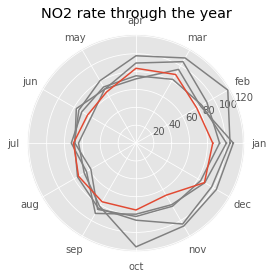

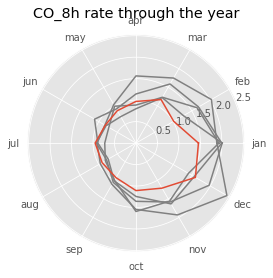

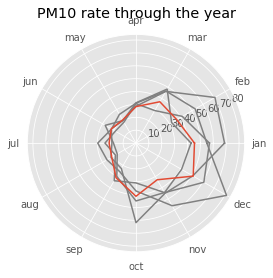

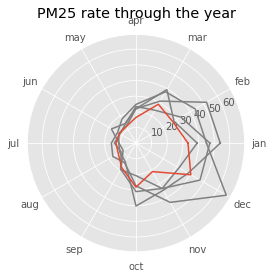

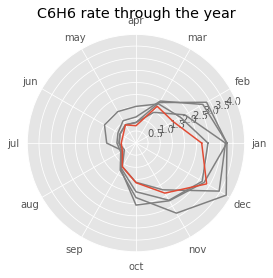

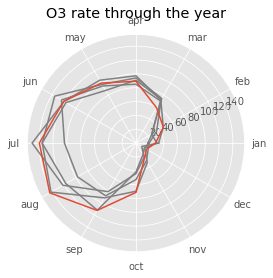

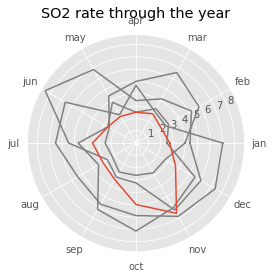

In [11]:
plot_substance('NO2')
plot_substance('CO_8h')
plot_substance('PM10')
plot_substance('PM25')
plot_substance('C6H6')
plot_substance('O3')
plot_substance('SO2')